In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [2]:
sheet_id = "12xH0FVZ8-IAwpbsGyldwNk9cxOOf85wYn3cs0hNdQQ4"
sheet_name = "BBBC039"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df = pd.read_csv(url)

In [3]:
df.head()

,file,cell_line,cells_manual,micronuclei_manual,cells_stardist,micronuclei_stardist
0,A02s1,U2OS,103,5.0,104,6
1,A06s6,U2OS,72,7.0,68,6
2,A09s1,U2OS,149,9.0,151,11
3,A12s7,U2OS,19,NaN,31,14
4,A15s5,U2OS,125,10.0,126,9


In [4]:
# Remove nans
df = df.dropna()
df

,file,cell_line,cells_manual,micronuclei_manual,cells_stardist,micronuclei_stardist
0,A02s1,U2OS,103,5.0,104,6
1,A06s6,U2OS,72,7.0,68,6
2,A09s1,U2OS,149,9.0,151,11
4,A15s5,U2OS,125,10.0,126,9
5,A16s2,U2OS,87,10.0,87,9
6,A16s3,U2OS,109,12.0,113,11
7,A18s1,U2OS,100,8.0,100,8
8,A20s4,U2OS,122,12.0,123,9
9,A21s1,U2OS,73,6.0,71,8
10,A22s8,U2OS,88,5.0,90,4


In [5]:
# Create micronuclei_cell_ratio for both manual and stardist
df["manual"] = df["micronuclei_manual"]/df["cells_manual"]
df["micronuclAI"] = df["micronuclei_stardist"]/df["cells_stardist"]
df

,file,cell_line,cells_manual,micronuclei_manual,cells_stardist,micronuclei_stardist,manual,micronuclAI
0,A02s1,U2OS,103,5.0,104,6,0.048544,0.057692
1,A06s6,U2OS,72,7.0,68,6,0.097222,0.088235
2,A09s1,U2OS,149,9.0,151,11,0.060403,0.072848
4,A15s5,U2OS,125,10.0,126,9,0.080000,0.071429
5,A16s2,U2OS,87,10.0,87,9,0.114943,0.103448
6,A16s3,U2OS,109,12.0,113,11,0.110092,0.097345
7,A18s1,U2OS,100,8.0,100,8,0.080000,0.080000
8,A20s4,U2OS,122,12.0,123,9,0.098361,0.073171
9,A21s1,U2OS,73,6.0,71,8,0.082192,0.112676
10,A22s8,U2OS,88,5.0,90,4,0.056818,0.044444


In [6]:
# Calcualte the absolute percentage difference (apd) between manual and micronuclAI
df["diff"] = abs(df["manual"] - df["micronuclAI"])
df["res"] = df["micronuclAI"] - df["manual"]
df["apd"] = df["diff"]/((df["manual"]+df["micronuclAI"])/2)
df["ba"] = (df["manual"]+df["micronuclAI"])/2
df

,file,cell_line,cells_manual,micronuclei_manual,cells_stardist,micronuclei_stardist,manual,micronuclAI,diff,res,apd,ba
0,A02s1,U2OS,103,5.0,104,6,0.048544,0.057692,0.009149,0.009149,0.172232,0.053118
1,A06s6,U2OS,72,7.0,68,6,0.097222,0.088235,0.008987,-0.008987,0.096916,0.092729
2,A09s1,U2OS,149,9.0,151,11,0.060403,0.072848,0.012445,0.012445,0.186791,0.066625
4,A15s5,U2OS,125,10.0,126,9,0.080000,0.071429,0.008571,-0.008571,0.113208,0.075714
5,A16s2,U2OS,87,10.0,87,9,0.114943,0.103448,0.011494,-0.011494,0.105263,0.109195
6,A16s3,U2OS,109,12.0,113,11,0.110092,0.097345,0.012747,-0.012747,0.122896,0.103718
7,A18s1,U2OS,100,8.0,100,8,0.080000,0.080000,0.000000,0.000000,0.000000,0.080000
8,A20s4,U2OS,122,12.0,123,9,0.098361,0.073171,0.025190,-0.025190,0.293706,0.085766
9,A21s1,U2OS,73,6.0,71,8,0.082192,0.112676,0.030484,0.030484,0.312871,0.097434
10,A22s8,U2OS,88,5.0,90,4,0.056818,0.044444,0.012374,-0.012374,0.244389,0.050631


In [7]:
# Melt the data fram to obtain the ratio for manual and micronuclAI
df_mn_ratio = df.melt(id_vars=["file"], value_vars=["manual", "micronuclAI"], var_name="micronuclei_cell_ratio_type", value_name="micronuclei_cell_ratio")
df_mn_ratio

,file,micronuclei_cell_ratio_type,micronuclei_cell_ratio
0,A02s1,manual,0.048544
1,A06s6,manual,0.097222
2,A09s1,manual,0.060403
3,A15s5,manual,0.080000
4,A16s2,manual,0.114943
...,...,...,...
77,D01s1,micronuclAI,0.086022
78,D02s8,micronuclAI,0.284211
79,D04s2,micronuclAI,0.117647
80,D04s9,micronuclAI,0.158879


/var/folders/9c/s912yv1x3dn6xwpfnggf8wt80000gn/T/ipykernel_89211/3600209511.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)


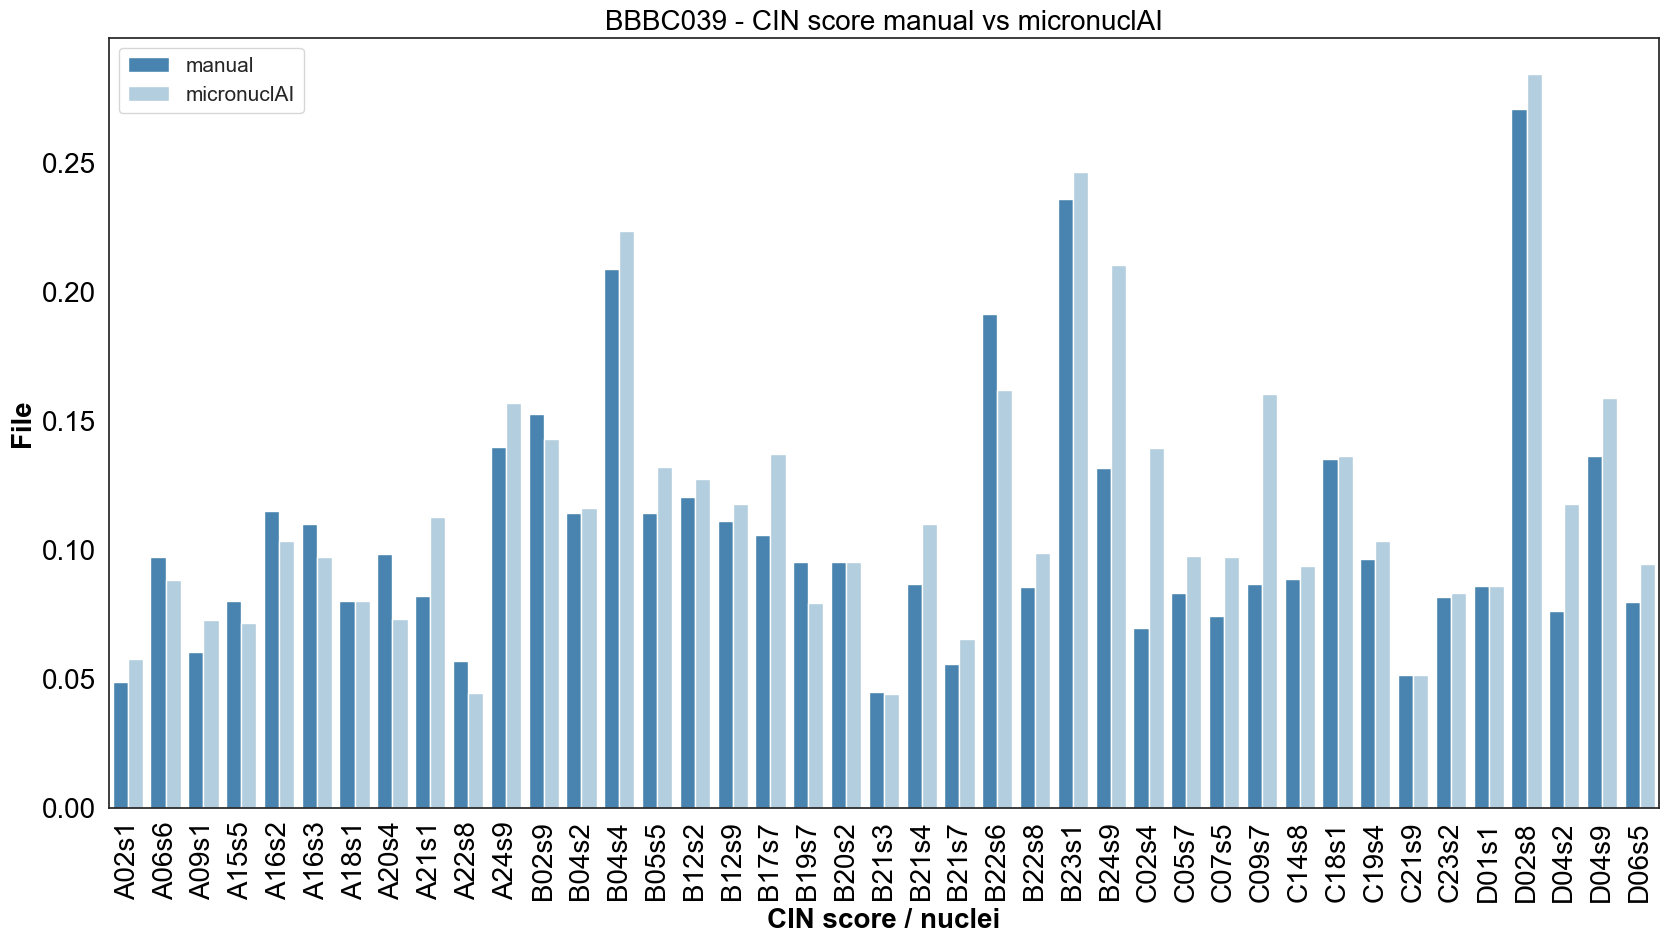

In [8]:
# Plot the ratio
sns.set(rc={'ytick.labelcolor':'black','xtick.labelcolor':'black', 'text.color':'black'})
sns.set_style("white")
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=df_mn_ratio, x="file", y="micronuclei_cell_ratio", hue="micronuclei_cell_ratio_type", palette="Blues_r", ax=ax)
ax.legend(loc='upper left', fontsize=15, markerscale=2)
ax.set_title("BBBC039 - CIN score manual vs micronuclAI", color="black", fontsize=20)
ax.set_xlabel("CIN score / nuclei", color="black", fontsize=20, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20, rotation=90)
ax.set_ylabel("File", color="black", fontsize=20, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
plt.show()
fig.savefig("../figures/BBBC039_comparison.png", dpi=300, bbox_inches='tight', transparent=True)
fig.savefig("../figures/BBBC039_comparison.pdf", dpi=300, bbox_inches='tight', transparent=True)

['B22s8' 'B04s4' 'A21s1' 'B23s1' 'A16s2' 'D06s5' 'B20s2' 'D04s9' 'C07s5'
 'A18s1']


/var/folders/9c/s912yv1x3dn6xwpfnggf8wt80000gn/T/ipykernel_89211/2485040254.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=20, rotation=0)


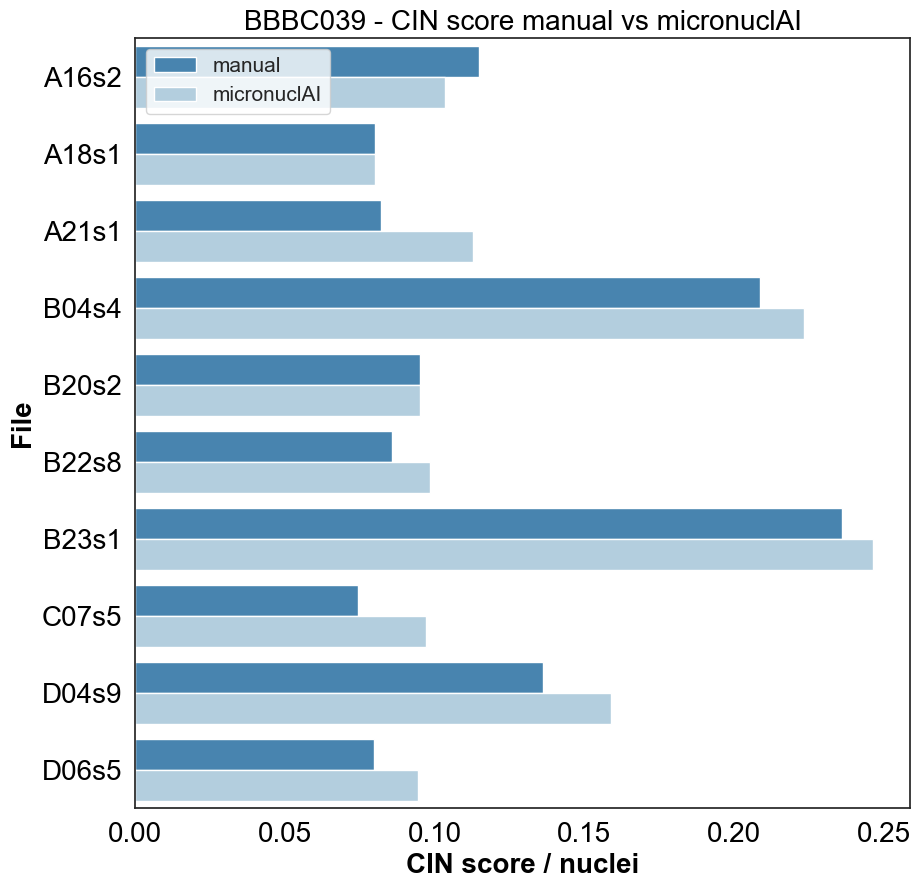

In [31]:
# choose 10 values at random from a numpy array
np.random.seed(42)
random_files = np.random.choice(df_mn_ratio["file"].unique(), 10, replace=False)
print (random_files)
# Select the rows where the file is in random_files
df_mn_ratio_sample = df_mn_ratio[df_mn_ratio["file"].isin(random_files)]

# Plot the ratio
sns.set(rc={'ytick.labelcolor':'black','xtick.labelcolor':'black', 'text.color':'black'})
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=df_mn_ratio_sample, y="file", x="micronuclei_cell_ratio", hue="micronuclei_cell_ratio_type", palette="Blues_r", ax=ax)
ax.legend(loc='upper left', fontsize=15, markerscale=2)
ax.set_title("BBBC039 - CIN score manual vs micronuclAI", color="black", fontsize=20)
ax.set_xlabel("CIN score / nuclei", color="black", fontsize=20, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20, rotation=0)
ax.set_ylabel("File", color="black", fontsize=20, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
plt.show()
fig.savefig("../figures/BBBC039_comparison_sample.png", dpi=300, bbox_inches='tight', transparent=True)
fig.savefig("../figures/BBBC039_comparison_sample.pdf", dpi=300, bbox_inches='tight', transparent=True)


/var/folders/9c/s912yv1x3dn6xwpfnggf8wt80000gn/T/ipykernel_58950/1286368625.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
/var/folders/9c/s912yv1x3dn6xwpfnggf8wt80000gn/T/ipykernel_58950/1286368625.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)


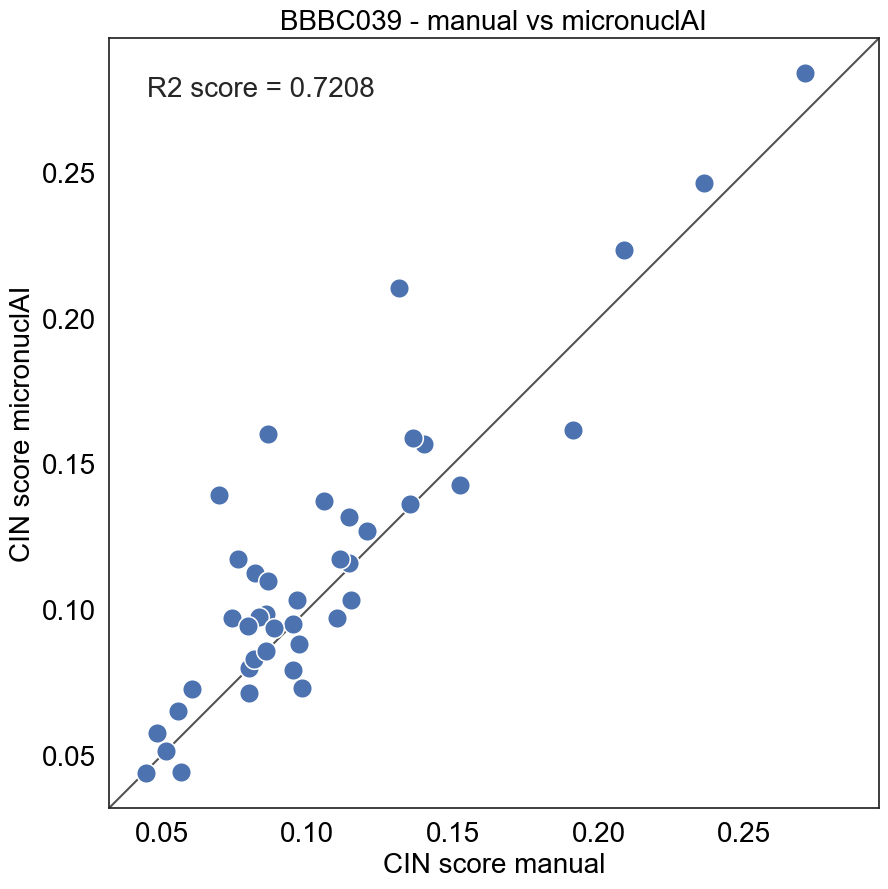

In [11]:
# Plot manual vs micronuclAI
sns.set(rc={'ytick.labelcolor':'black','xtick.labelcolor':'black', 'text.color':'black'})
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=df, x="manual", y="micronuclAI", ax=ax, s=200)

# Add R2 score
r2 = r2_score(df["manual"], df["micronuclAI"])
ax.text(0.05, 0.95, f"R2 score = {r2:.4f}", transform=ax.transAxes, fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

#Plot diagonal line
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title("BBBC039 - manual vs micronuclAI", color="black", fontsize=20)
ax.set_xlabel("CIN score manual", color="black", fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
ax.set_ylabel("CIN score micronuclAI", color="black", fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)

plt.show()
fig.savefig("../figures/BBBC039_corr_black.png", dpi=300, bbox_inches='tight', transparent=True)
fig.savefig("../figures/BBBC039_corr_black.pdf", dpi=300, bbox_inches='tight', transparent=True)

/var/folders/9c/s912yv1x3dn6xwpfnggf8wt80000gn/T/ipykernel_58950/1034915509.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
/var/folders/9c/s912yv1x3dn6xwpfnggf8wt80000gn/T/ipykernel_58950/1034915509.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)


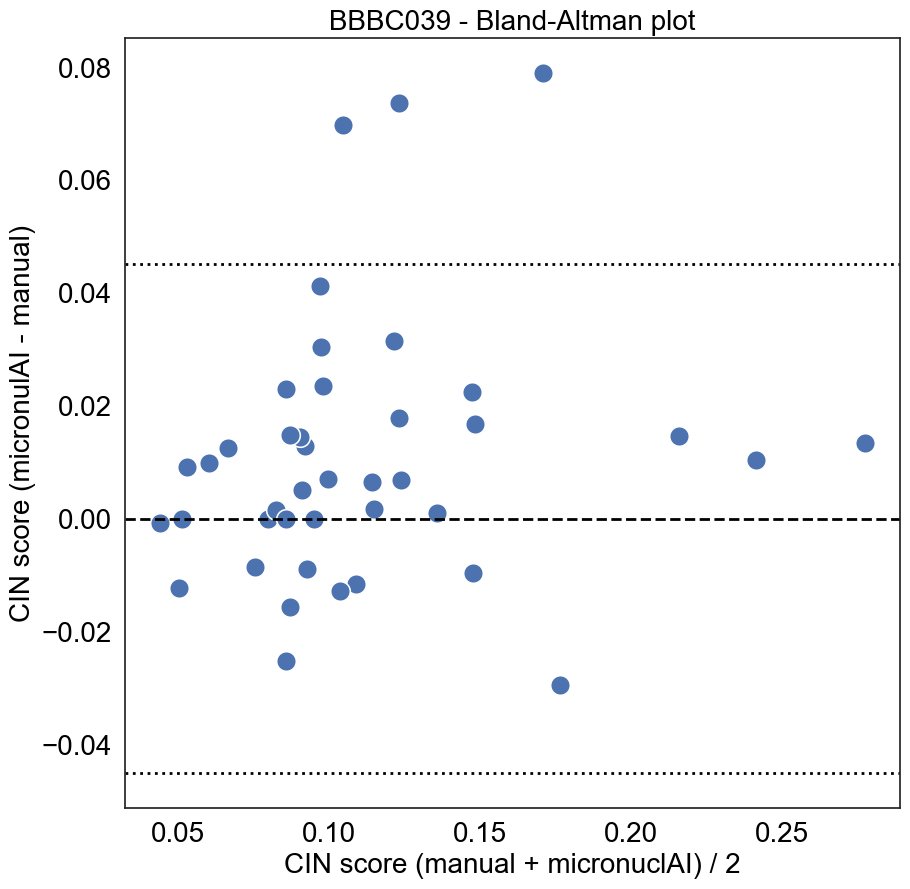

In [13]:
# Plot residuals vs apd
sns.set(rc={'ytick.labelcolor':'black','xtick.labelcolor':'black', 'text.color':'black'})
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=df, x="ba", y="res",ax=ax, s=200)

# Plot horizontal line at 0
ax.axhline(y=0, color='Black', linestyle='--', linewidth=2)

# Add two lines for the 0.95 confidence interval
ax.axhline(y=1.96*np.std(df["res"]), color='Black', linestyle=':', linewidth=2)
ax.axhline(y=-1.96*np.std(df["res"]), color='Black', linestyle=':', linewidth=2)

# Formating
ax.set_title("BBBC039 - Bland-Altman plot", color="black", fontsize=20)
ax.set_xlabel("CIN score (manual + micronuclAI) / 2", color="black", fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
ax.set_ylabel("CIN score (micronulAI - manual)", color="black", fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
plt.show()

plt.show()
fig.savefig("../figures/BBBC039_BA_black.png", dpi=300, bbox_inches='tight', transparent=True)
fig.savefig("../figures/BBBC039_BA_black.pdf", dpi=300, bbox_inches='tight', transparent=True)